In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
tf.random.set_seed(42)

In [3]:
hand = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170,
 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253,
 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253,
 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253,
 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253,
 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 139, 253,
 190, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 190,
 253, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35,
 241, 225, 160, 108, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 81, 240, 253, 253, 119, 25, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 45, 186, 253, 253, 150, 27, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 16, 93, 252, 253, 187, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 249, 253, 249, 64, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 46, 130, 183, 253, 253, 207, 2, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39,
 148, 229, 253, 253, 253, 250, 182, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 114, 221,
 253, 253, 253, 253, 201, 78, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 23, 66, 213, 253, 253,
 253, 253, 198, 81, 2, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 18, 171, 219, 253, 253, 253, 253,
 195, 80, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 55, 172, 226, 253, 253, 253, 253, 244, 133,
 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 136, 253, 253, 253, 212, 135, 132, 16, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0]], dtype=uint8)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

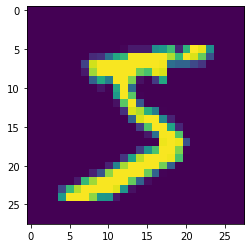

In [10]:
plt.imshow(X_train[0])

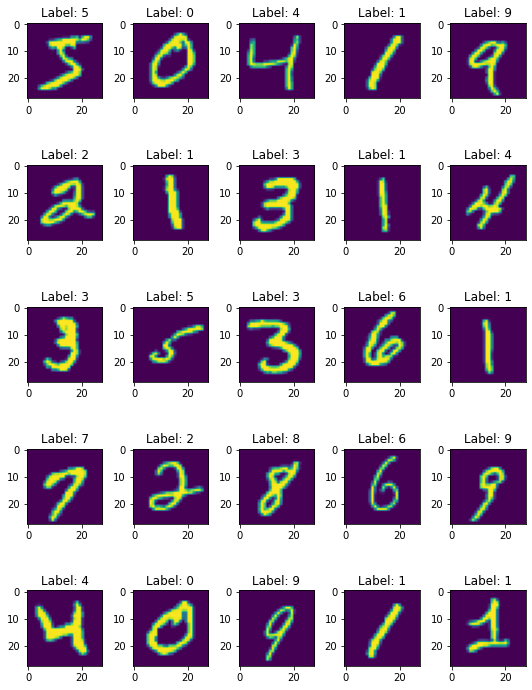

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [15]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
 [1., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [18]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0373 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0284 - accuracy: 0.9909


In [20]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 2s - loss: 0.0292 - accuracy: 0.9915 - 2s/epoch - 7ms/step


In [21]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 105ms/step


array([[7.11592027e-13, 1.35957723e-09, 8.58934701e-10, 3.58559973e-08,
 6.74863609e-10, 1.13969875e-11, 2.30665538e-18, 9.99999881e-01,
 1.40311877e-11, 6.15749798e-08],
 [1.62556461e-11, 1.21630461e-09, 1.00000000e+00, 1.68213099e-15,
 1.81518974e-14, 1.92340482e-18, 2.28357524e-12, 3.27651826e-14,
 7.78852080e-14, 1.12304740e-17],
 [4.66283789e-10, 9.99983072e-01, 2.07611393e-07, 3.94510735e-09,
 4.11497967e-06, 1.20148629e-08, 2.43032929e-07, 1.20949780e-05,
 2.62461924e-07, 9.50026688e-08],
 [9.99999166e-01, 1.21798075e-11, 9.98889504e-09, 1.10544733e-10,
 5.69972923e-11, 3.29155103e-09, 8.46333705e-07, 1.65355596e-09,
 1.25563684e-08, 8.97048391e-09]], dtype=float32)

In [22]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 [==============================] - 0s 22ms/step


array([1. , 1. , 1.0000001, 1. ], dtype=float32)

In [23]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [24]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 [==============================] - 2s 7ms/step
[[ 977    0    0    1    0    0    2    0    0    0]
 [   0 1130    1    1    0    1    1    1    0    0]
 [   1    0 1027    0    0    0    0    3    1    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  968    0    2    0    1   11]
 [   0    0    0    6    0  885    1    0    0    0]
 [   4    2    1    0    1    5  943    0    2    0]
 [   0    1    5    1    0    0    0 1018    1    2]
 [   1    1    2    1    0    0    1    0  966    2]
 [   1    0    1    3    4    4    0    1    1  994]]


In [25]:
path = "/data/notebook_files/Numbers"

In [34]:
img = Image.open(os.path.join(path, '0.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1570, 1487)
L


In [35]:
newsize = (28,28)
img0 = img.resize(newsize)
img0

In [36]:
testimg = asarray(img0)

In [37]:
print(testimg.shape)

(28, 28)


In [38]:
testimg = testimg.reshape(1, 28, 28, 1)

In [39]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
0


In [40]:
img = Image.open(os.path.join(path, '1.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(976, 1409)
L


In [41]:
newsize = (28,28)
img1 = img.resize(newsize)
img1

In [42]:
testimg = asarray(img1)

In [43]:
print(testimg.shape)

(28, 28)


In [44]:
testimg = testimg.reshape(1, 28, 28, 1)

In [45]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 20ms/step
1


In [46]:
img = Image.open(os.path.join(path, '2.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1697, 1435)
L


In [47]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [48]:
testimg = asarray(img2)

In [49]:
print(testimg.shape)

(28, 28)


In [50]:
testimg = testimg.reshape(1, 28, 28, 1)

In [51]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 27ms/step
2


In [52]:
img = Image.open(os.path.join(path, '3.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1503, 1565)
L


In [53]:
newsize = (28,28)
img3 = img.resize(newsize)
img3

In [54]:
testimg = asarray(img3)

In [55]:
print(testimg.shape)

(28, 28)


In [56]:
testimg = testimg.reshape(1, 28, 28, 1)

In [57]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
3


In [58]:
img = Image.open(os.path.join(path, '4.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1655, 1648)
L


In [59]:
newsize = (28,28)
img4 = img.resize(newsize)
img4

In [60]:
testimg = asarray(img4)

In [61]:
print(testimg.shape)

(28, 28)


In [62]:
testimg = testimg.reshape(1, 28, 28, 1)

In [63]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
4


In [64]:
img = Image.open(os.path.join(path, '5.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1907, 1672)
L


In [65]:
newsize = (28,28)
img5 = img.resize(newsize)
img5

In [66]:
testimg = asarray(img5)

In [67]:
print(testimg.shape)

(28, 28)


In [68]:
testimg = testimg.reshape(1, 28, 28, 1)

In [69]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
5


In [70]:
img = Image.open(os.path.join(path, '6.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1387, 1692)
L


In [71]:
newsize = (28,28)
img6 = img.resize(newsize)
img6

In [72]:
testimg = asarray(img6)

In [73]:
print(testimg.shape)

(28, 28)


In [74]:
testimg = testimg.reshape(1, 28, 28, 1)

In [75]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 22ms/step
6


In [76]:
img = Image.open(os.path.join(path, '7.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1356, 1530)
L


In [77]:
newsize = (28,28)
img7 = img.resize(newsize)
img7

In [78]:
testimg = asarray(img7)

In [79]:
print(testimg.shape)

(28, 28)


In [80]:
testimg = testimg.reshape(1, 28, 28, 1)

In [81]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 36ms/step
1


It seems that the model failed at recognizing number 7 as such, mistaking it for 1.

In [82]:
img = Image.open(os.path.join(path, '8.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1671, 1409)
L


In [83]:
newsize = (28,28)
img8 = img.resize(newsize)
img8

In [84]:
testimg = asarray(img8)

In [85]:
print(testimg.shape)

(28, 28)


In [86]:
testimg = testimg.reshape(1, 28, 28, 1)

In [87]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
8


In [88]:
img = Image.open(os.path.join(path, '9.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1412, 1545)
L


In [89]:
newsize = (28,28)
img9 = img.resize(newsize)
img9

In [90]:
testimg = asarray(img9)

In [91]:
print(testimg.shape)

(28, 28)


In [92]:
testimg = testimg.reshape(1, 28, 28, 1)

In [93]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 21ms/step
7


Also in this case, the model failed. In fact, it mistook 9 for 7.